In [1]:
import quandl as q

In [20]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import plotly.plotly as py  
py.sign_in('oldzhangbuythings', 'j8IlrfpZl9qUbRXU3ZQm')
# (*) Useful Python/Plotly tools
import plotly.tools as tls   

# (*) Graph objects to piece together plots
from plotly.graph_objs import *

In [3]:
df_cycle = pd.DataFrame(np.zeros((6, 7)), columns=['start_date', 'end_date', 'Duration', 'rate_start', 'rate_end', 'base_points', 'Pace'])
df_cycle.iloc[ 0, :] = ['1983-05-02', '1984-08-21', 16, 8.5, 11.75, 325, 20]
df_cycle.iloc[ 1, :] = ['1986-12-16', '1987-09-04', 9, 5.88, 7.25, 138, 15]
df_cycle.iloc[ 2, :] = ['1988-03-29', '1989-02-24', 11, 6.5, 9.75, 325, 30]
df_cycle.iloc[ 3, :] = ['1994-02-04', '1995-02-01', 12, 3, 6, 300, 25]
df_cycle.iloc[ 4, :] = ['1999-06-30', '2000-04-16', 11, 4.75, 6.5, 175, 16]
df_cycle.iloc[ 5, :] = ['2004-06-30', '2006-06-29', 24, 1.0, 5.25, 425, 17]

In [34]:
df_cycle

,start_date,end_date,Duration,rate_start,rate_end,base_points,Pace
0,1983-05-02,1984-08-21,16.0,8.50,11.75,325.0,20.0
1,1986-12-16,1987-09-04,9.0,5.88,7.25,138.0,15.0
2,1988-03-29,1989-02-24,11.0,6.50,9.75,325.0,30.0
3,1994-02-04,1995-02-01,12.0,3.00,6.00,300.0,25.0
4,1999-06-30,2000-04-16,11.0,4.75,6.50,175.0,16.0
5,2004-06-30,2006-06-29,24.0,1.00,5.25,425.0,17.0


In [4]:
fed_rate_raw = pd.read_csv('data/EFFR.csv')
fed_rate_raw.loc[len(fed_rate_raw)] = ['2017-03-01', 0.66]
fed_rate_raw.DATE = pd.to_datetime(fed_rate_raw.DATE)
fed_rate_raw.tail()

,DATE,FEDFUNDS
748,2016-11-01,0.41
749,2016-12-01,0.54
750,2017-01-01,0.65
751,2017-02-01,0.66
752,2017-03-01,0.66


In [5]:
gdp_raw = pd.read_csv('data/gdp_real.csv')
#gdp_raw = pd.read_csv('data/gdp_real_rate.csv')
gdp_raw.columns = ['DATE', 'GDP']
gdp_raw.DATE = pd.to_datetime(gdp_raw.DATE)
gdp_raw.tail()

,DATE,GDP
275,2015-10-01,16490.7
276,2016-01-01,16525.0
277,2016-04-01,16583.1
278,2016-07-01,16727.0
279,2016-10-01,16804.1


In [6]:
mark_1 = fed_rate_raw[fed_rate_raw.DATE == '1978-01-01'].index[0]
mark_2 = gdp_raw[gdp_raw.DATE == '1978-01-01'].index[0]
df_plot = fed_rate_raw.iloc[mark_1:, :]
gdp_plot = gdp_raw.iloc[mark_2:, :]

In [7]:
sp500_raw = q.get('YAHOO/INDEX_GSPC')
vix_raw = q.get('YAHOO/INDEX_VIX', collapse='monthly')
dji_raw = q.get('YAHOO/INDEX_DJI')

In [17]:
mask_1 = (sp500_raw.index >= '1978-01-03')
sp500 = sp500_raw[mask_1]
vix = vix_raw[vix_raw.index >= '1978-01-03']
dji = dji_raw[dji_raw.index >= '1978-01-03']
vix.head(3)

,Open,High,Low,Close,Volume,Adjusted Close
Date,,,,,,
1990-01-31,25.360001,25.360001,25.360001,25.360001,0.0,25.360001
1990-02-28,21.990000,21.990000,21.990000,21.990000,0.0,21.990000
1990-03-31,19.730000,19.730000,19.730000,19.730000,0.0,19.730000


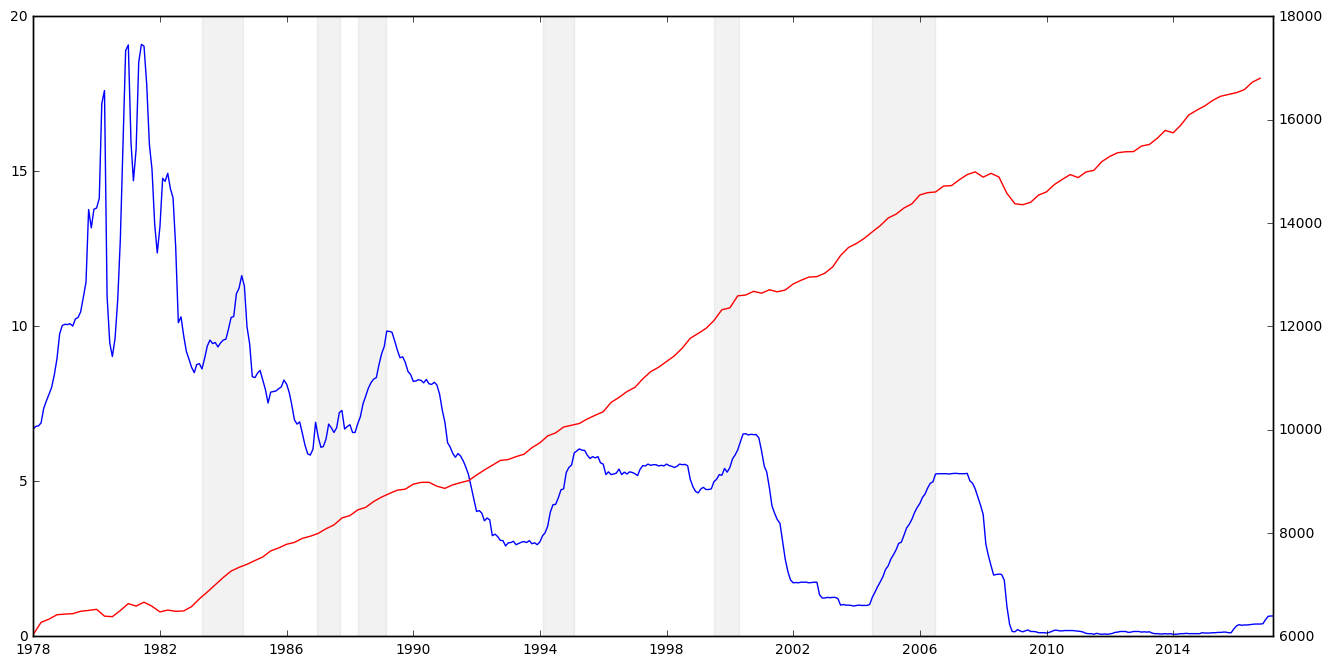

In [33]:
fig, ax1 = plt.subplots()
fig.set_size_inches(16, 8)
ax1.plot(df_plot.DATE, df_plot.FEDFUNDS)
for i in xrange(6):
    ax1.axvspan(df_cycle.iloc[i, 0], df_cycle.iloc[i, 1], alpha=0.1, color='grey')
ax2 = ax1.twinx()
#ax2.plot(sp500.index, sp500['Adjusted Close'], 'r')
#ax2.plot(dji.index, dji['Adjusted Close'], 'r')    
#ax2.plot(vix.index, vix['Adjusted Close'], 'r')    
ax2.plot(gdp_plot.DATE, gdp_plot.GDP, 'r')    
#py.iplot_mpl(fig, filename='fed_rates_hike')